In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Evasive-PDF-Samples.csv')

In [6]:
print(list(df))

['pdfsize', 'pages', 'title characters', 'images', 'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer', 'startxref', 'ObjStm', 'JS', 'OBS_JS', 'Javascript', 'OBS_Javascript', 'OpenAction', 'OBS_OpenAction', 'Acroform', 'OBS_Acroform', 'class']


Text(0, 0.5, 'pages')

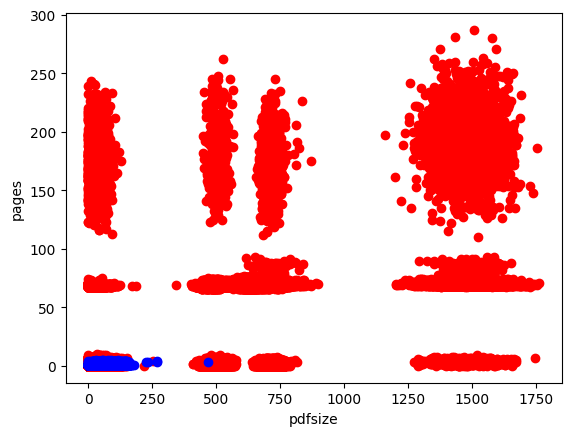

In [21]:
_df = df[df['class'] == 1]
plt.scatter(_df['pdfsize'], _df['pages'], c='red');
_df = df[df['class'] == 0]
plt.scatter(_df['pdfsize'], _df['pages'], c='blue');
plt.xlabel('pdfsize')
plt.ylabel('pages')

In [4]:
df['class']

0         1
1         1
2         1
3         1
4         1
         ..
499995    0
499996    0
499997    0
499998    0
499999    0
Name: class, Length: 500000, dtype: int64

In [7]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model.fit(df.drop('class', axis=1), df['class'])
model.coef_

array([ 2.16945462e-04,  9.95400244e-04, -6.00661425e-03, -9.11101284e-03,
        2.22254694e-04,  4.59171638e-05,  7.07779824e-04,  2.11532111e-04,
       -2.06309921e-01, -5.47975688e-03, -4.89919370e-02,  4.40249452e-02,
        2.32645861e-02,  0.00000000e+00,  4.49588210e-02,  0.00000000e+00,
        5.35952832e-02,  0.00000000e+00, -2.65162547e-01,  0.00000000e+00])

In [12]:
df['pred'] = model.predict(df.drop('class', axis=1)) > 0.5
df['pred']

0          True
1          True
2          True
3          True
4          True
          ...  
499995    False
499996    False
499997    False
499998    False
499999    False
Name: pred, Length: 500000, dtype: bool

In [16]:
from sklearn.metrics import accuracy_score, f1_score

In [17]:
accuracy_score(df['class'], df['pred']), f1_score(df['class'], df['pred'])

(0.982414, 0.9902682457940295)